In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")


In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
#remove unnecessary columns
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [5]:
df.shape

(29020, 18)

In [6]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

7661

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(21359, 18)

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df["booking_status"].value_counts()


booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

#### Data is imbalanced

In [12]:
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved',
            'market_segment_type','repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']


In [13]:
len(cat_cols)


6

In [14]:
len(num_cols)

12

#### Data Analysis 

In [15]:
data = df.copy() 

#### Univariate Analysis

In [16]:
# Plot histogram and box plot of all numerical cols
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data = df , x = column , ax = axes[i][0], kde = True, palette = "Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data = df, x = column, ax = axes[i][1], palette = "Blues")
        axes[i][1].set_title(f"Box Plot for {column} ")

    plt.tight_layout()
    plt.show()

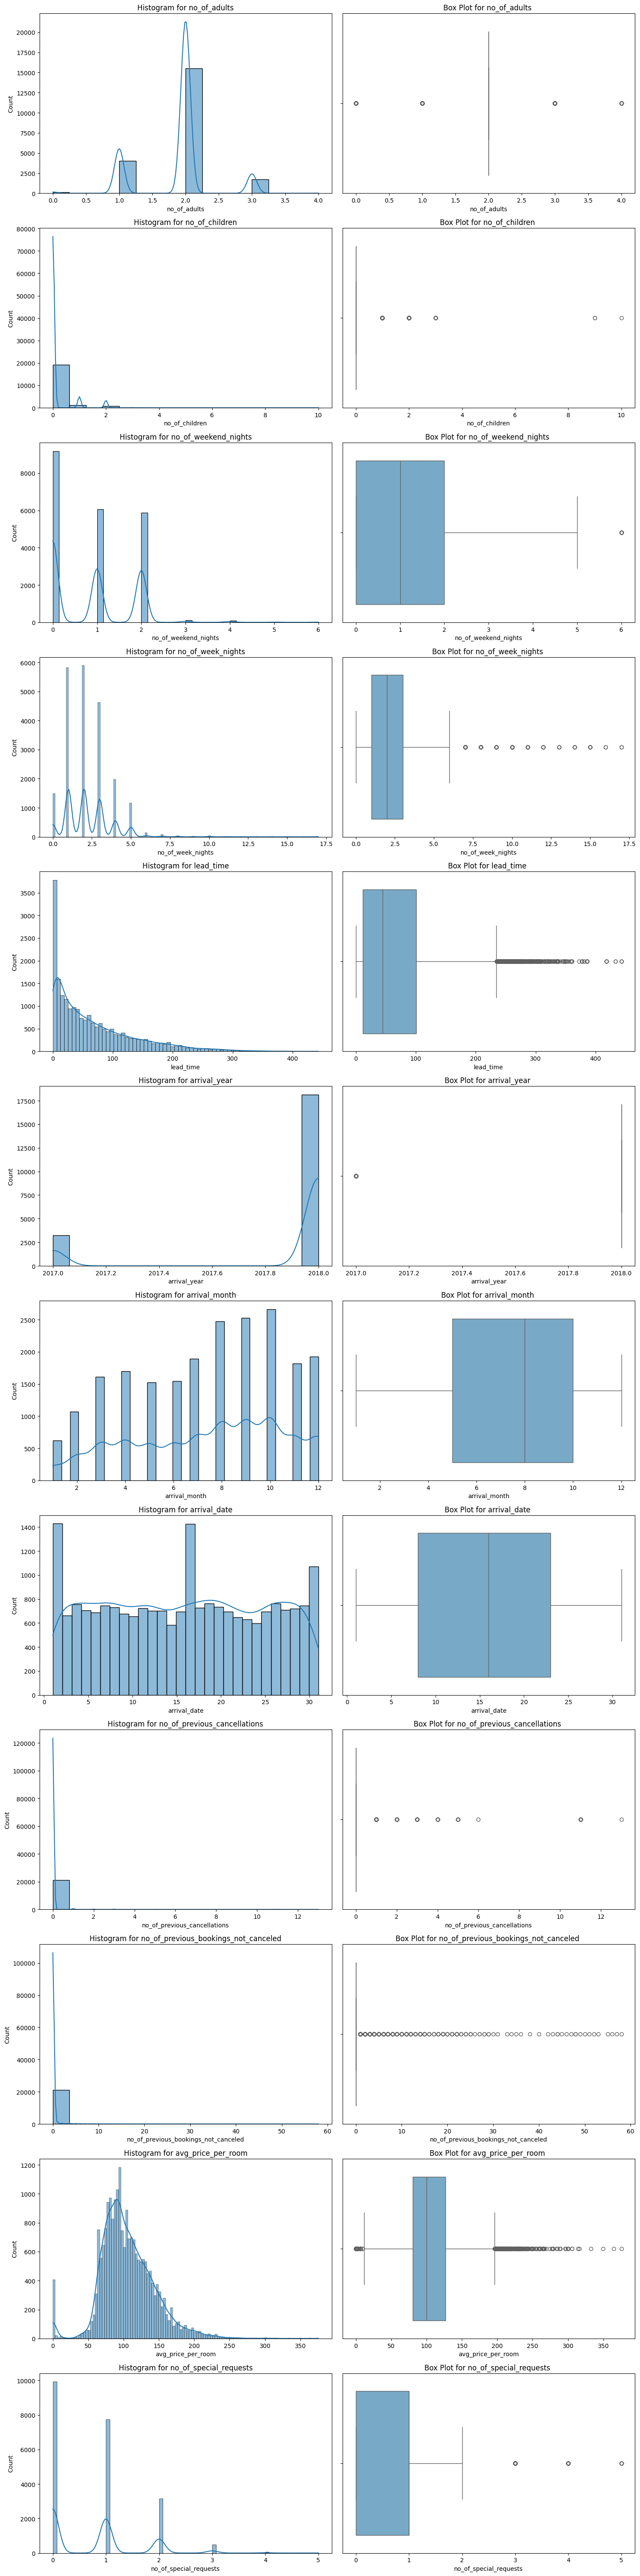

In [17]:
num_plot_dist(data, num_cols)

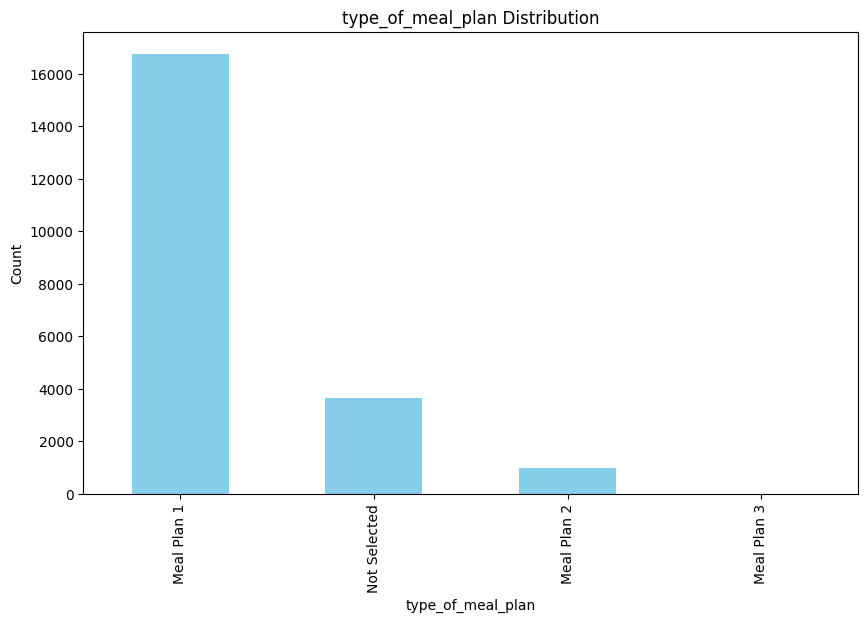

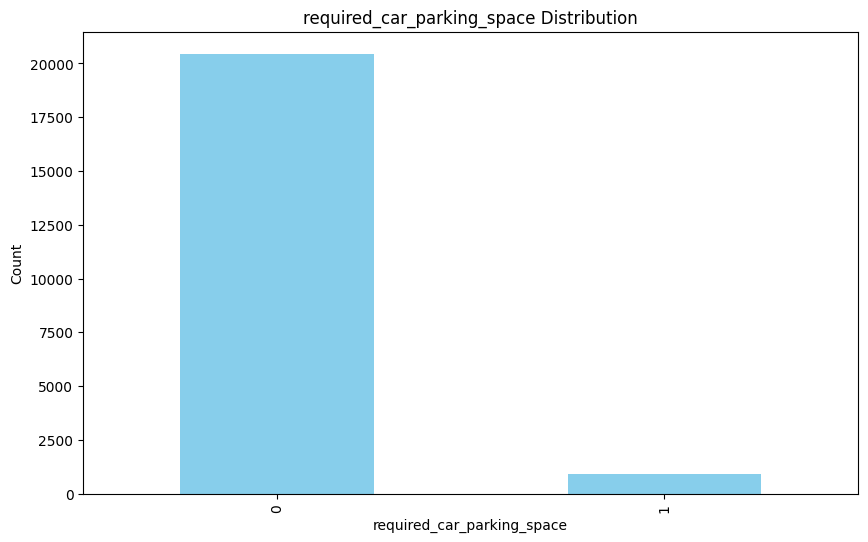

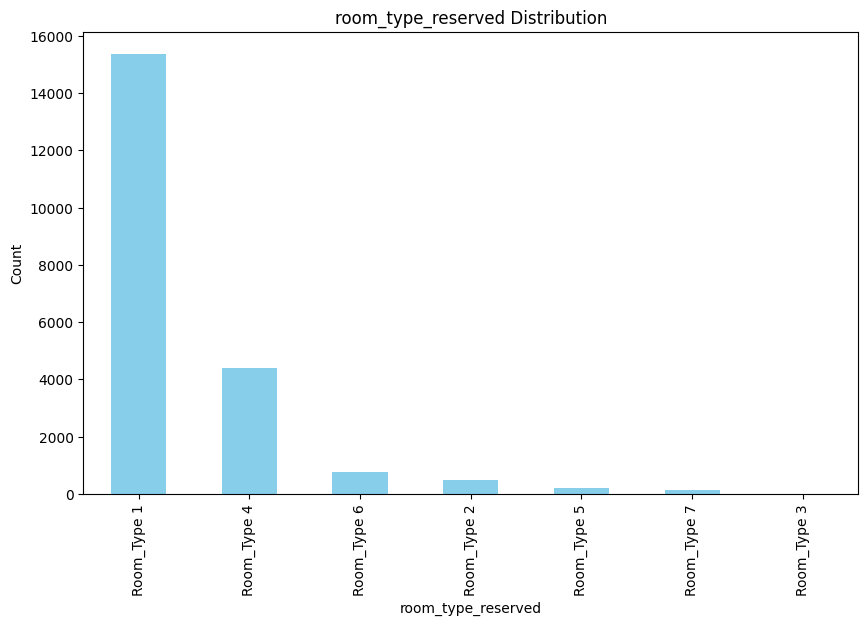

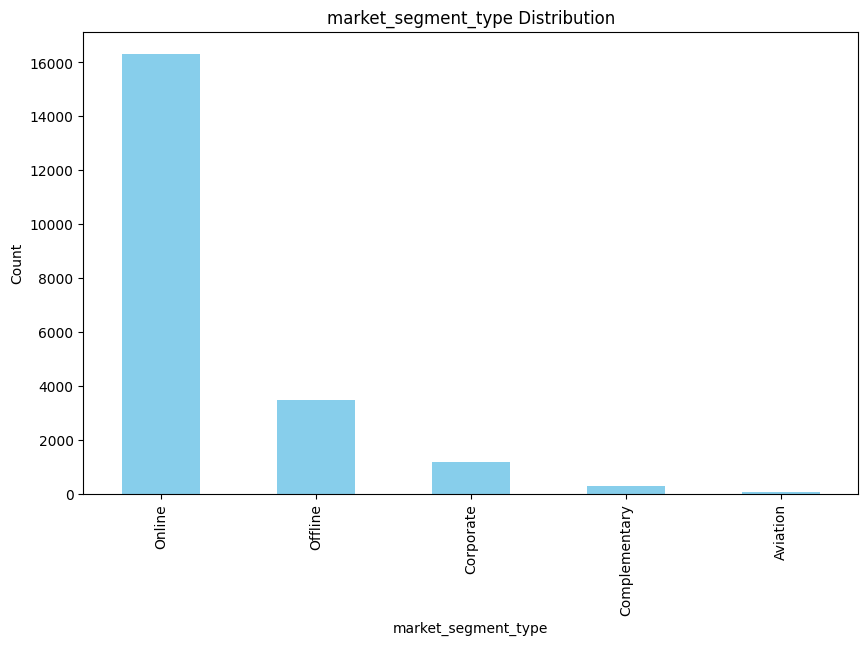

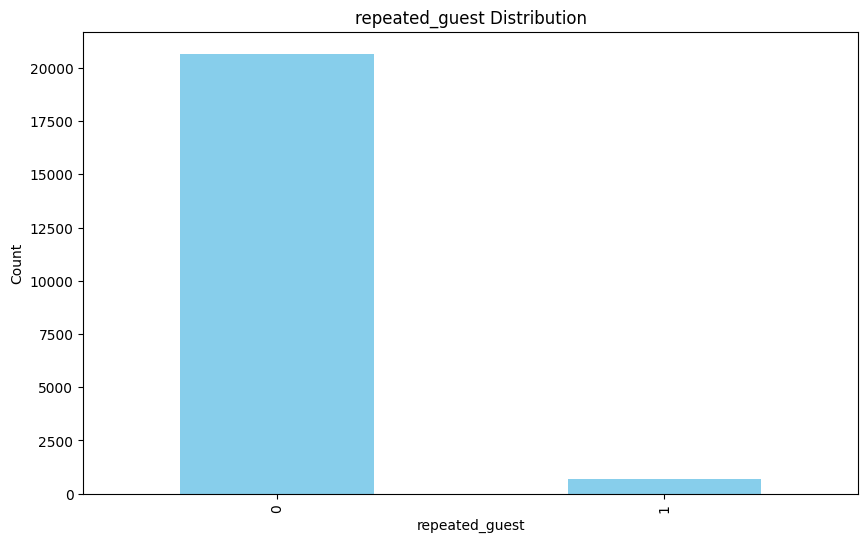

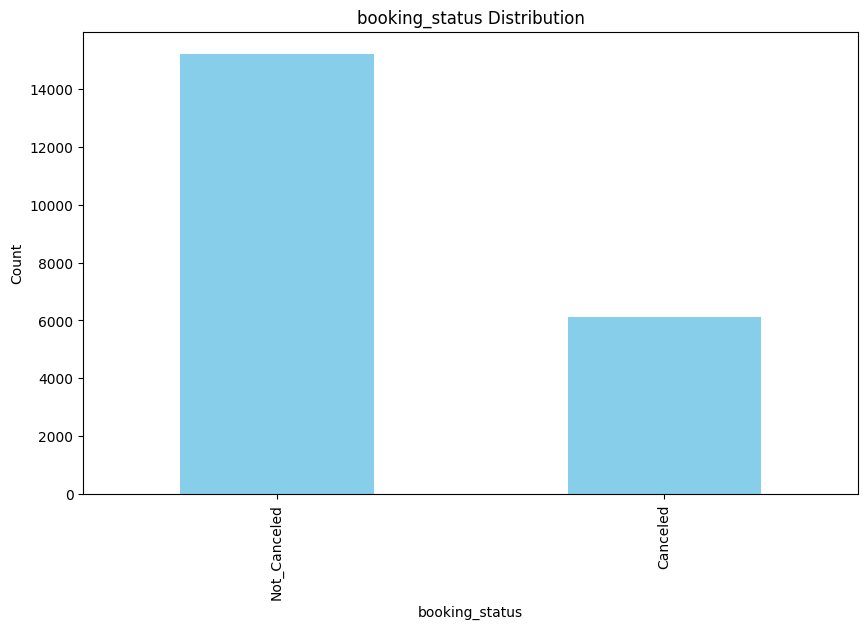

In [18]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### Bivariate Analysis

In [19]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()
    for i,column in enumerate(num_features):
        sns.boxplot(x = target, y = column, ax = axes[i], data=df, palette = "Greens")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()


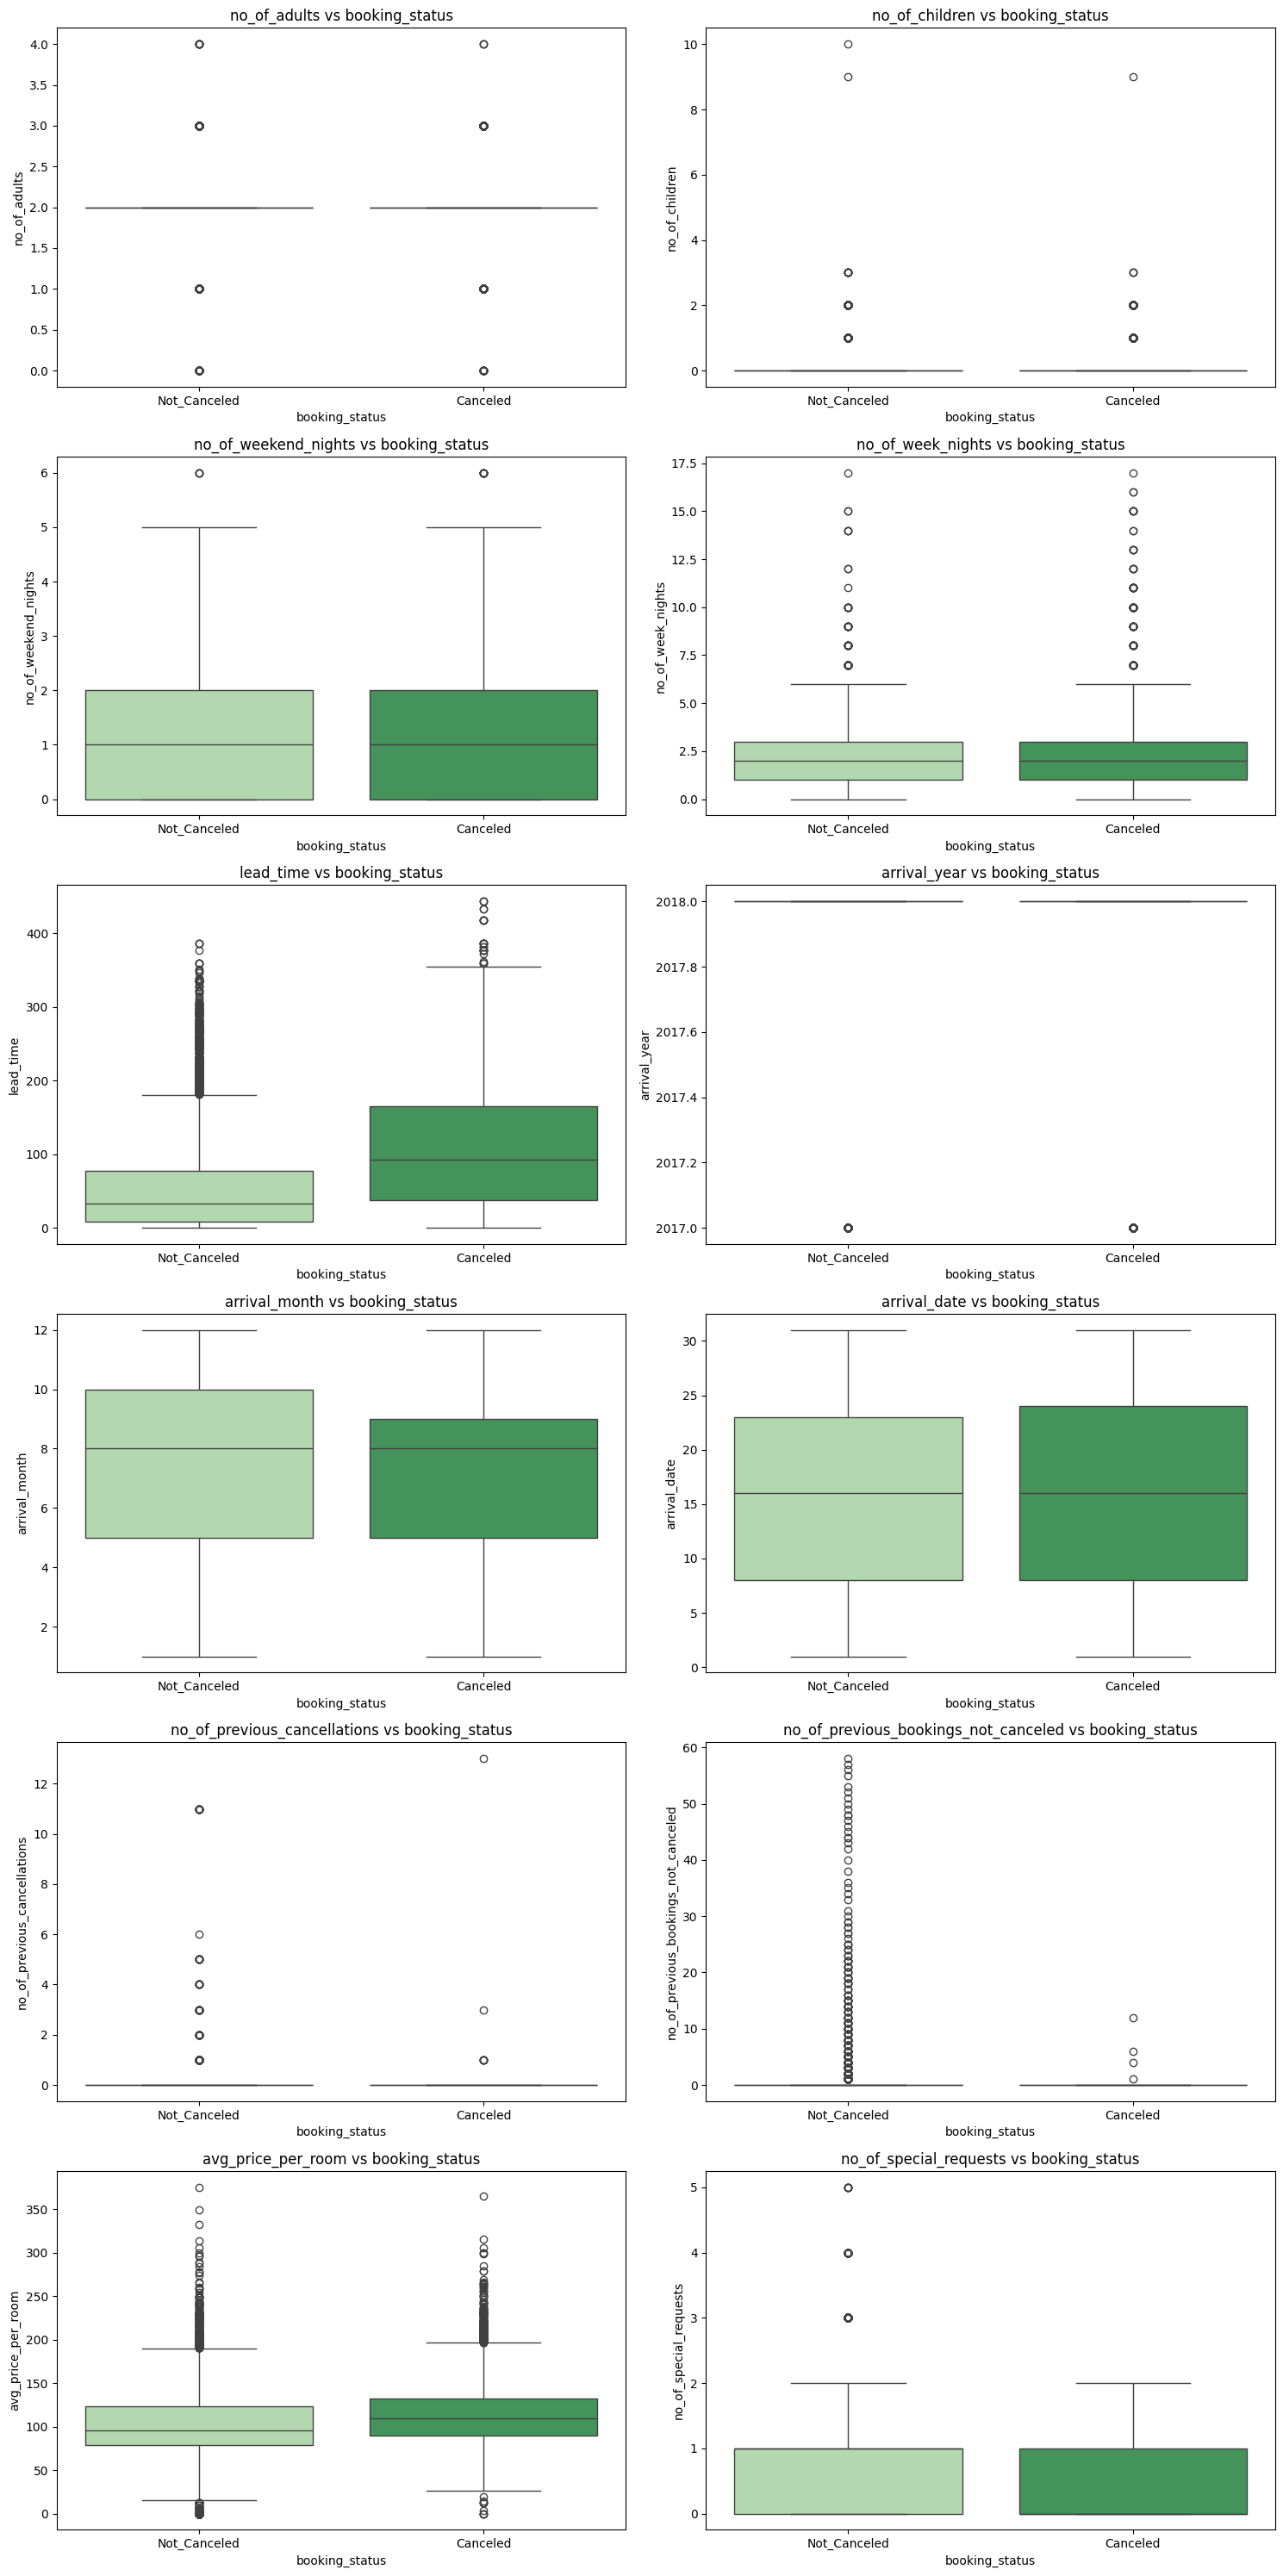

In [20]:
plot_bivariate_num(data, 'booking_status', num_cols)

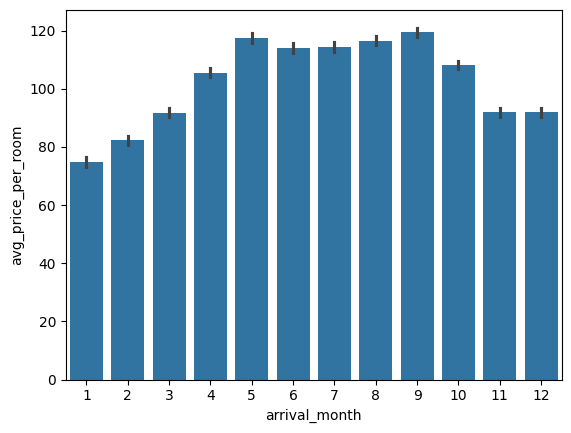

In [21]:
sns.barplot(x = 'arrival_month', y = 'avg_price_per_room', data = data)
plt.show()

In [22]:
def plot_bivariate_cat(df, target, cat_features):
    
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x= feature , hue = target, data = df , palette = "Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis = 'x', rotation = 90)

    plt.tight_layout()
    plt.show()

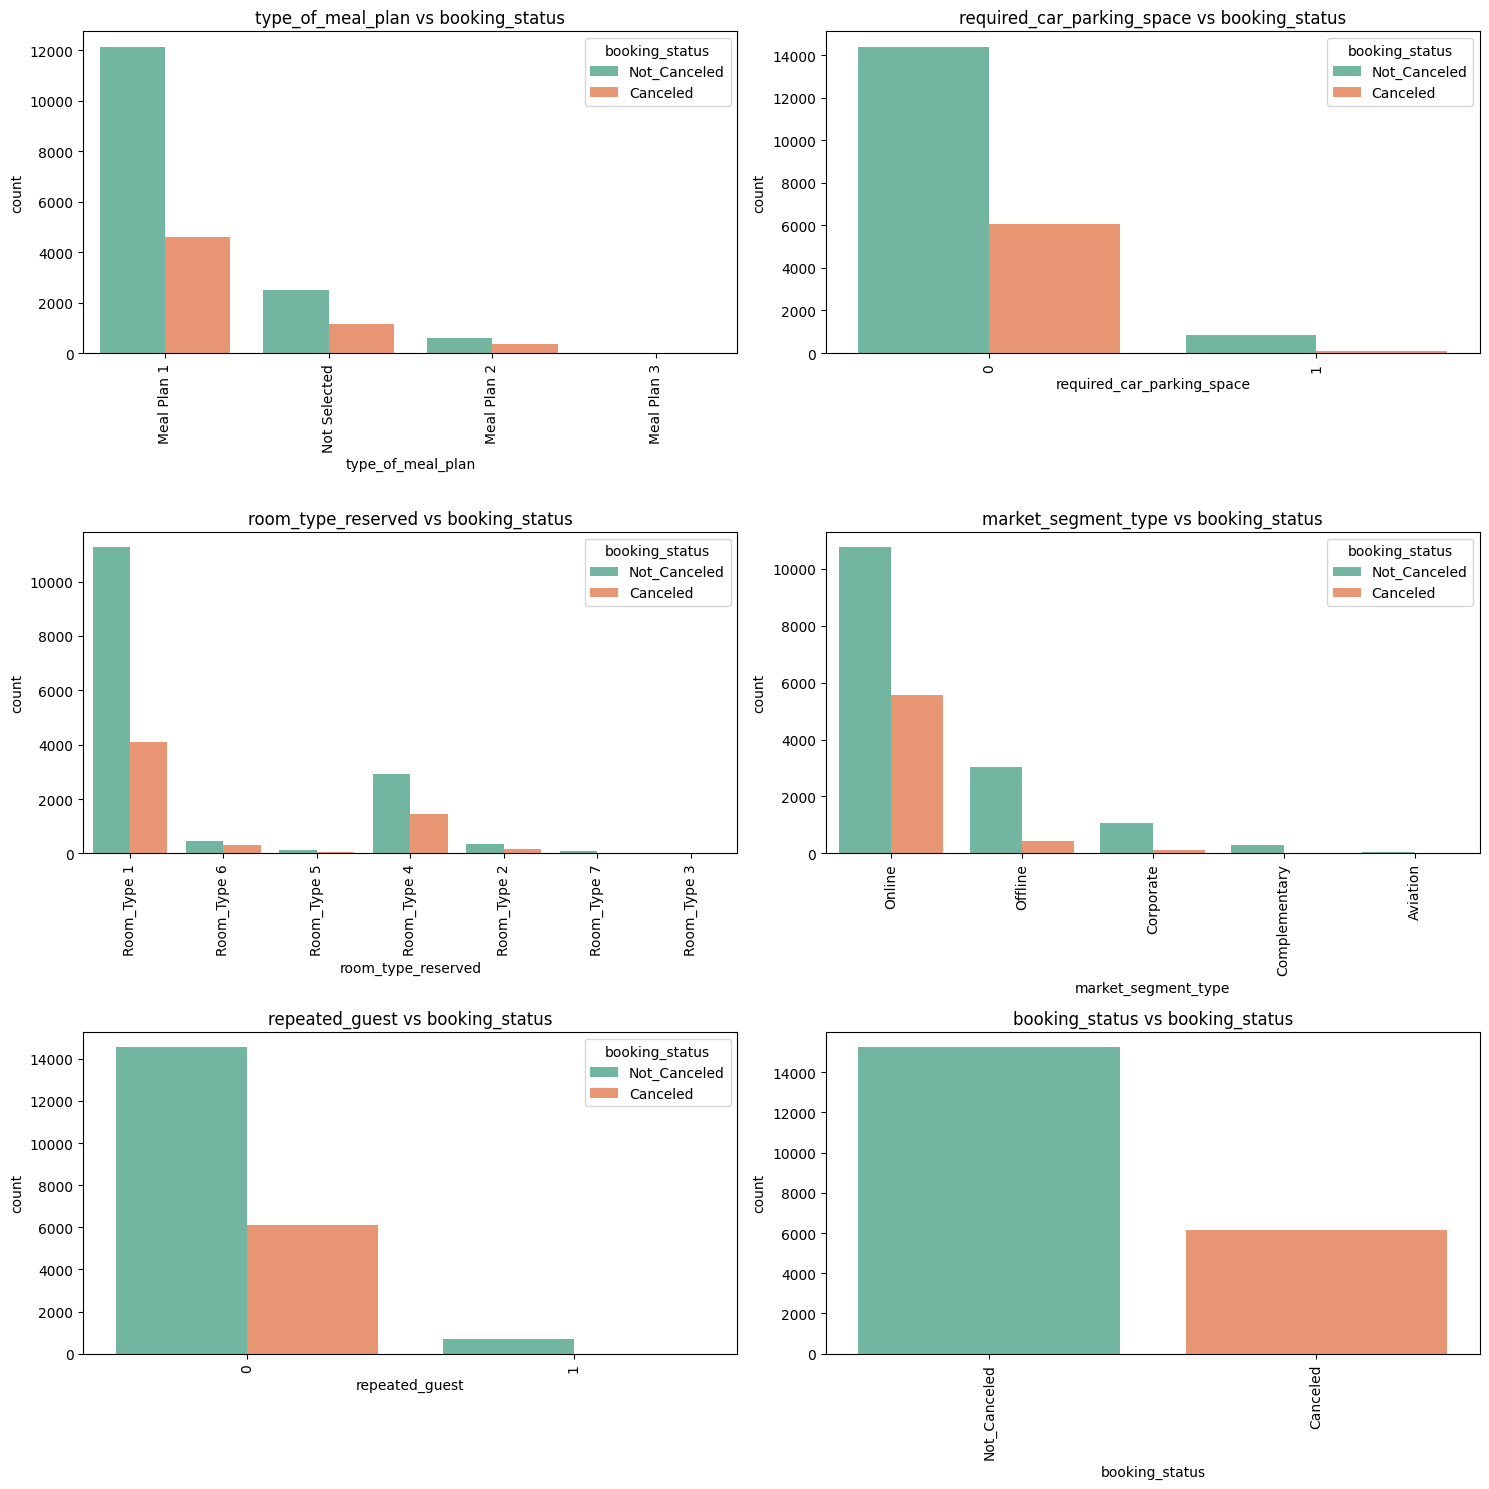

In [23]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [27]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

##### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [34]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [35]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [37]:
pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [44]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [45]:
vif_data


,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### Thus no multicollinearity

In [46]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

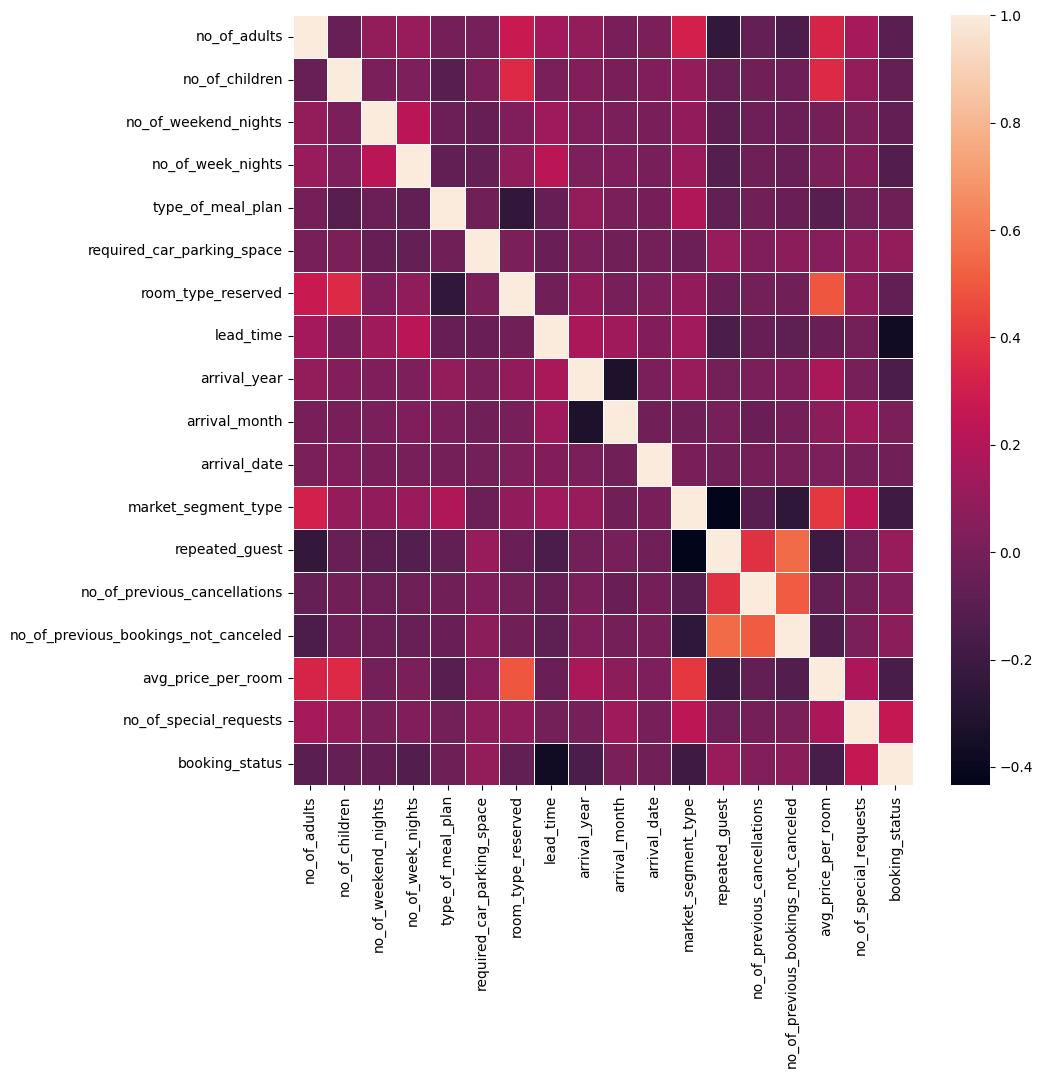

In [53]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = False, linewidths = 0.5)

#### Skewness

In [61]:
skewness = df.skew()

In [62]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            11.240884
no_of_previous_bookings_not_canceled     6.427598
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [59]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

#### Imbalanced data

In [64]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

#### Oversampling

In [71]:
#Split data into X and Y
X = df.drop(columns = 'booking_status')
y = df['booking_status']

In [66]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [68]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [73]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X,y)

In [77]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [78]:
balanced_df = pd.DataFrame(X_res, columns = X.columns)
balanced_df["booking_status"] = y_res

In [80]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [82]:
balanced_df.shape

(30462, 18)

In [83]:
df = balanced_df.copy()

#### Feature Selection

In [84]:
len(df.columns)

18

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
#Split data into X and Y
X = df.drop(columns = 'booking_status')
y = df['booking_status']

In [87]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [89]:
feature_importance = model.feature_importances_

In [90]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'importance': feature_importance
})

In [94]:
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending = False)

In [102]:
top_10_features = top_features_importance_df["Feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [104]:
len(top_10_df.columns)

11

In [105]:
df = top_10_df.copy()

#### Model selection

In [106]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [109]:
#Split data into X and Y
X = df.drop(columns = 'booking_status')
y = df['booking_status']


In [110]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [111]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Ada Boost" : AdaBoostClassifier(random_state=42),
    "Support Vector Machine" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes" : GaussianNB(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "XGBoost" : XGBClassifier(random_state=42),
    "LightGBM" : LGBMClassifier(random_state=42)
}

In [112]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 - Score": []
}

In [ ]:
for model_name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict (x_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 - Score"].append(f1)

TypeError: 'float' object is not callable

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_time               30462 non-null  int64  
 1   no_of_special_requests  30462 non-null  int64  
 2   avg_price_per_room      30462 non-null  float64
 3   arrival_month           30462 non-null  int64  
 4   arrival_date            30462 non-null  int64  
 5   market_segment_type     30462 non-null  int64  
 6   no_of_week_nights       30462 non-null  int64  
 7   no_of_weekend_nights    30462 non-null  int64  
 8   type_of_meal_plan       30462 non-null  int64  
 9   room_type_reserved      30462 non-null  int64  
 10  booking_status          30462 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.6 MB


In [ ]:
df['avg_price_per_room'] = df['avg_price_per_room'].astype('int')